<h1><center>EARTH 468: LAB02</center></h1>  

<h6>Submitted by: Prithvi Thakur</h6>
<h6>Email: prith@umich.edu</h6>

In [2]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
from scipy import io
import seaborn as sns
sns.set(color_codes=True)
plt.rcParams["patch.force_edgecolor"] = True
%matplotlib inline

<h3>Pre-Lab: Function to compute weighted mean</h3>

In [3]:
# Input should be numpy arrays
weighted_mean = lambda weight, value: np.sum(weight*value)/np.sum(weight)

<h3>(a) Load the data and plot number of births per year</h3>

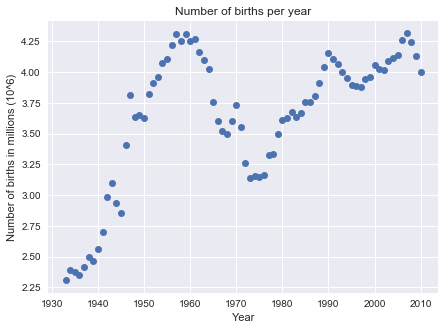

In [4]:
data = io.loadmat('EARTH468_Lab02.mat')

birth = data["births"]
year = data["year"]
age = data["age"]
deaths = data["deaths"]

# Initialize a figure
fig = plt.figure(figsize=(7,5))

# Initialize subplots
ax = fig.add_subplot(111)

# Plot 
ax.plot(year, birth/1e6, 'bo')
#sns.regplot(year, (birth/1e6), fit_reg=False)

ax.set_ylabel('Number of births in millions (10^6)')
ax.set_xlabel('Year')
ax.set_title('Number of births per year')

plt.show()

<h3>(b) Difference in no. of Births</h3>

In [4]:
# Index of 2010 and 1940
idx_2010 = np.where(year==2010)[1]
idx_1940 = np.where(year==1940)[1]

# print number of births
print("No. of births in 2010    = ", birth[0,idx_2010])
print("No. of births in 1940    = ", birth[0,idx_1940])
print("\nThe difference in no. of \nbirths in 2010 and 1940  = ", \
      birth[0,idx_2010]-birth[0,idx_1940])

No. of births in 2010    =  [3999386]
No. of births in 1940    =  [2559000]

The difference in no. of 
births in 2010 and 1940  =  [1440386]


<h3>(c) Difference in the no. of deaths</h3>

In [5]:
# Get the row and column indices
row_40 = np.where(age==40)[0]
col_1940 = np.where(year==1940)[1]
col_2010 = np.where(year==2010)[1]

# Get the deaths
deaths_1940 = deaths[row_40,col_1940]
deaths_2010 = deaths[row_40,col_2010]

print("Deaths at age 40 in the year 1940 = ", deaths_1940)
print("Deaths at age 40 in the year 2010 = ", deaths_2010)
print("\nThe difference in no. of deaths\n\
in 2010 and 1940                  = ",deaths_2010-deaths_1940)

Deaths at age 40 in the year 1940 =  [ 9607.66]
Deaths at age 40 in the year 2010 =  [ 7107.39]

The difference in no. of deaths
in 2010 and 1940                  =  [-2500.27]


<h3>(d) Plot avg age of death each year</h3>

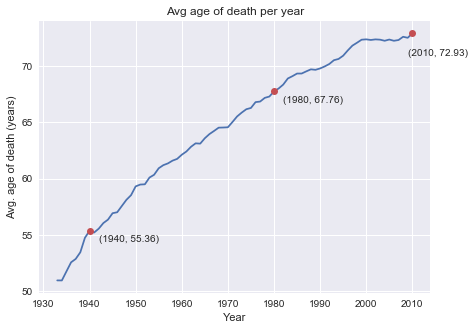

Avg. age of death in 1940 = 55.36 years
Avg. age of death in 1980 = 67.76 years
Avg. age of death in 2010 = 72.93 years

The increase in avg death age from 1940 to 2010 is 17.57 years


In [6]:
# Get the weighted mean of no. of people dying each year
avg_deaths_year = np.zeros((len(year[0])))

avg_deaths_year = [weighted_mean(deaths[:,i], age[:,0]) \
                   for i in range(len(year[0]))]

# Avg age of death 1940, 1980 and 2010 SHOWN IN PLOT
col_1980 = np.where(year==1980)[1]
avg_deaths_1940 = avg_deaths_year[col_1940[0]]
avg_deaths_1980 = avg_deaths_year[col_1980[0]]
avg_deaths_2010 = avg_deaths_year[col_2010[0]]

# Initialize plot
fig = plt.figure(figsize=(7,5))

# Initialize axes
ax = fig.add_subplot(111)

# Plot
ax.plot(year[0], avg_deaths_year, 'b-')
ax.plot(1940, avg_deaths_1940, 'ro')
ax.plot(1980, avg_deaths_1980, 'ro')
ax.plot(2010, avg_deaths_2010, 'ro')

ax.annotate('(1940, %0.2f)' %avg_deaths_1940, xy=(1940, avg_deaths_1940),\
            xytext=(1942,avg_deaths_1940-1), )

ax.annotate('(1980, %0.2f)' %avg_deaths_1980, xy=(1980, avg_deaths_1980),\
            xytext=(1982,avg_deaths_1980-1), )

ax.annotate('(2010, %0.2f)' %avg_deaths_2010, xy=(2010, avg_deaths_2010),\
            xytext=(2009,avg_deaths_2010-2), )

ax.set_xlabel("Year")
ax.set_ylabel("Avg. age of death (years)")
ax.set_title("Avg age of death per year")
plt.show()

print("Avg. age of death in 1940 = %.2f years" %avg_deaths_1940)
print("Avg. age of death in 1980 = %.2f years" %avg_deaths_1980)
print("Avg. age of death in 2010 = %.2f years" %avg_deaths_2010)
print("\nThe increase in avg death age from 1940 to 2010 is %.2f years" \
      %(avg_deaths_2010-avg_deaths_1940))

We should use weighted mean where the number of people dying are the weights and age is the value. This is because there is not an equal probability of people dying at all ages.

<h3>(e) Distribution of age of death in 1940, 1980, 2010</h3>

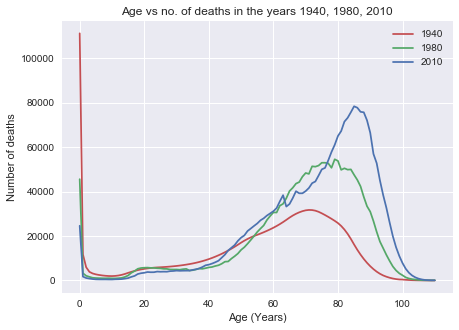

In [7]:
# Indices of the years
col_1940 = np.where(year==1940)[1]
col_1980 = np.where(year==1980)[1]
col_2010 = np.where(year==2010)[1]

# Deaths in that year
death_1940 = deaths[:,col_1940]
death_1980 = deaths[:,col_1980]
death_2010 = deaths[:,col_2010]

# Initialize plot
fig = plt.figure(figsize=(7,5))

# Initialize axes
ax = fig.add_subplot(111)

# Plot
ax.plot(age, death_1940, 'r', label='1940')
ax.plot(age, death_1980, 'g', label='1980')
ax.plot(age, death_2010, 'b', label='2010')

ax.set_xlabel("Age (Years)")
ax.set_ylabel("Number of deaths")
ax.set_title("Age vs no. of deaths in the years 1940, 1980, 2010")
plt.legend(loc='upper right')
plt.show()

<h3>(f) Avg. age of deaths of adults</h3>

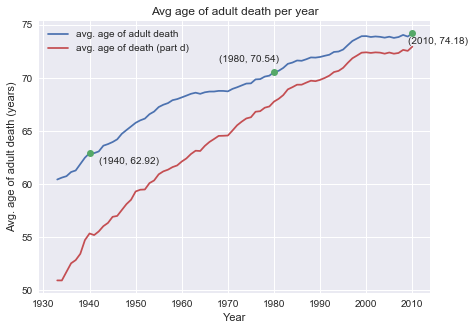

Avg. age of adult death in 1940 = 62.92 years
Avg. age of adult death in 1980 = 70.54 years
Avg. age of adult death in 2010 = 74.18 years

The increase in avg adult death age from 1940 to 2010 is 11.27 years


In [8]:
# Weighted mean of no. of adults (>=20years)
# dying each year
avg_adult_deaths = np.zeros((len(year[0])))

avg_adult_deaths = [weighted_mean(deaths[20:111,i], age[20:111,0])\
                   for i in range(len(year[0]))]

# Avg age of death 1940, 1980 and 2010 SHOWN IN PLOT
avg_adult_deaths_1940 = avg_adult_deaths[col_1940[0]]
avg_adult_deaths_1980 = avg_adult_deaths[col_1980[0]]
avg_adult_deaths_2010 = avg_adult_deaths[col_2010[0]]

# Initialize plot
fig = plt.figure(figsize=(7,5))

# Initialize axes
ax = fig.add_subplot(111)

# Plot
ax.plot(year[0], avg_adult_deaths, 'b-', label='avg. age of adult death')
ax.plot(year[0], avg_deaths_year, 'r-', label='avg. age of death (part d)')
ax.plot(1940, avg_adult_deaths_1940, 'go')
ax.plot(1980, avg_adult_deaths_1980, 'go')
ax.plot(2010, avg_adult_deaths_2010, 'go')

ax.annotate('(1940, %0.2f)' %avg_adult_deaths_1940, xy=(1940, avg_adult_deaths_1940),\
            xytext=(1942,avg_adult_deaths_1940-1), )

ax.annotate('(1980, %0.2f)' %avg_adult_deaths_1980, xy=(1980, avg_adult_deaths_1980),\
            xytext=(1968,avg_adult_deaths_1980+1), )

ax.annotate('(2010, %0.2f)' %avg_adult_deaths_2010, xy=(2010, avg_adult_deaths_2010),\
            xytext=(2009,avg_adult_deaths_2010-1), )

ax.set_xlabel("Year")
ax.set_ylabel("Avg. age of adult death (years)")
ax.set_title("Avg age of adult death per year")
plt.legend(loc='upper left')
plt.show()

print("Avg. age of adult death in 1940 = %.2f years" %avg_adult_deaths_1940)
print("Avg. age of adult death in 1980 = %.2f years" %avg_adult_deaths_1980)
print("Avg. age of adult death in 2010 = %.2f years" %avg_adult_deaths_2010)
print("\nThe increase in avg adult death age from 1940 to 2010 is %.2f years" \
      %(avg_adult_deaths_2010-avg_adult_deaths_1940))

<h3>(g) Probability of surviving first year</h3>

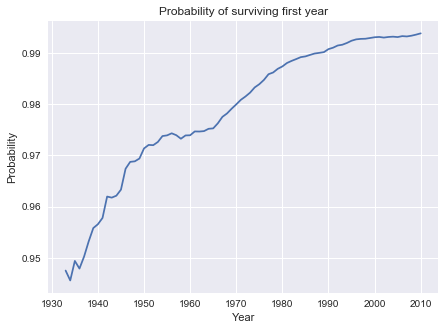

In [9]:
# [(Birth - Death(at age 0))/Birth]
prob = (birth-deaths[0,:])/birth

# Initialize plot
fig = plt.figure(figsize=(7,5))

# Initialize axes
ax = fig.add_subplot(111)

# Plot
ax.plot(year[0], prob[0], 'b-')

ax.set_xlabel("Year")
ax.set_ylabel("Probability")
ax.set_title("Probability of surviving first year")

plt.show()

(i) The avg. age of death in any given year does not represent the distribution of death in that year well, because the distribution is not gaussian. The mean does not lie at the peak of the distribution (part e). The avg. age of adult death represrents the distribution better than the avg. age of all deaths.

(ii) The avg. age of death has increased by 17.57 years while the avg. age of adult death has increased by 11.27 years from 1940 to 2010. So, the children have increased their expectancy more substantially (~ 6 years out of 20 years) than the adults (11.27 years). We are not taking into account the children who grow up and are later included as adults.